<div style="text-align: center"> <h1>Exp.7.3 Scientific Computing using Scikit Learn – Principal Component Analysis and KNeighborsClassifier</h1></div>

**Aim:**

To perform prediction of iris data using Principal Component Analysis using Sklearn python library.

**Procedure:**

Step 1: Import the library in the session with an alias by typing ‘import Sklearn’,’import train_test_split’,PCA, accuracy_score from sklearn.

Step 2: Load iris dataset into iris using load_iris().

Step 3: Create a Principal Component Analysis model using PCA() and assign it to pca.

Step 4: Fit the classifier to the training data using pca.fit_transform().

Step 5: Visualize the reduced data using the Scatter plot function.


## Program

In [1]:
import wget
import numpy as np
import pandas as pd
import sklearn.metrics 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

### Load the Iris dataset

In [2]:
path_to_data ='C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'
path_to_data

'C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'

In [3]:
iris = pd.read_csv(path_to_data)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
#To know the data types of the variables.
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [5]:
# the count of each class we use value_counts()
iris['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [6]:
#Separating independant variable and dependent variable("Species")
#X = iris.drop(['variety','target'], axis=1)
X = iris.drop(['variety'], axis=1)
y = iris['variety']   # target
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [7]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#checking for Null values
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
encoder = LabelEncoder()
iris['variety'] = encoder.fit_transform(iris['variety'])

In [10]:
#finding different class labels 
np.unique(iris['variety'])

array([0, 1, 2])

### Create a PCA object

In [11]:
pca = PCA(n_components=4)
pca

PCA(n_components=4)

### Fit the PCA object to the data

In [12]:
X_pca = pca.fit_transform(X)

### Visualize the reduced data

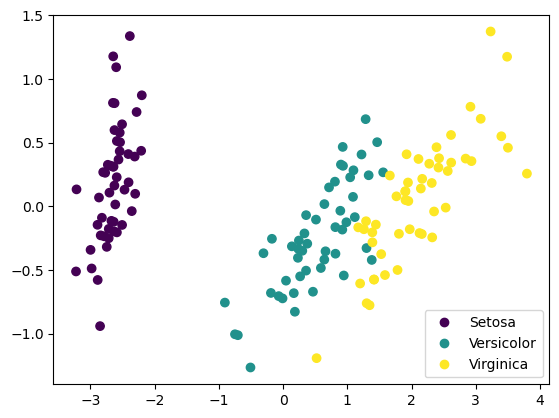

In [13]:
classes = ['Setosa', 'Versicolor', 'Virginica']
#scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.variety)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

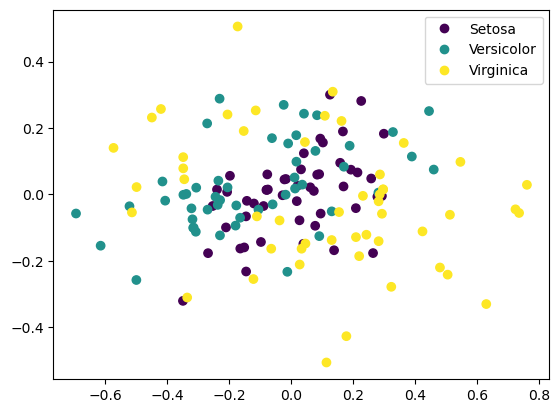

In [14]:
scatter = plt.scatter(X_pca[:, 2], X_pca[:, 3], c=iris.variety)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## KNeighborsClassifier

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [17]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [18]:
print("Train score after PCA",knn_pca.score(X_train,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test,y_test),"%")

Train score after PCA 0.9714285714285714 %
Test score after PCA 0.9777777777777777 %


In [19]:
y_pred = knn_pca.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa'], dtype=object)

In [20]:
y1=y_test.value_counts()
y1

variety
Versicolor    18
Setosa        16
Virginica     11
Name: count, dtype: int64

In [21]:
confusionmatrix1 = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusionmatrix1)

Confusion Matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [22]:
y_pred1 = knn_pca.predict(X_train)
y_pred1

array(['Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Versic

In [23]:
y2=y_train.value_counts()
y2

variety
Virginica     39
Setosa        34
Versicolor    32
Name: count, dtype: int64

In [24]:
confusionmatrix = sklearn.metrics.confusion_matrix(y_train, y_pred1)
print("Confusion Matrix: \n", confusionmatrix)

Confusion Matrix: 
 [[34  0  0]
 [ 0 30  2]
 [ 0  1 38]]


In [25]:
cm_df = pd.DataFrame(confusionmatrix,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print("Confusion Matrix: \n", cm_df)

Confusion Matrix: 
            SETOSA  VERSICOLR  VIRGINICA
SETOSA         34          0          0
VERSICOLR       0         30          2
VIRGINICA       0          1         38


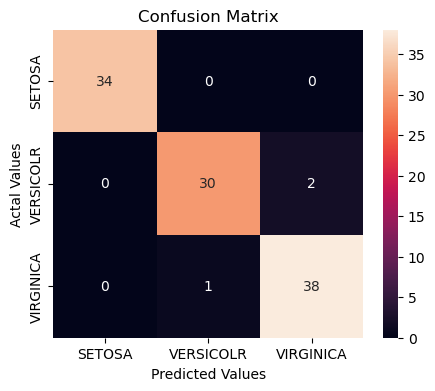

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report

### Accuracy,Precision,Recall and F1-Score for Setosa , Versicolor and Virginica

### Macro Average and Weighted Average

In [27]:
#classification report for training set 
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        34
  Versicolor       0.97      0.94      0.95        32
   Virginica       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [28]:
#classification report for training set 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Result:**
    
Thus, the visualization of reduced data using Principal Component Analysis of the iris dataset is done successfully